In [59]:
# import dependencies
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import requests
import datetime as dt
import seaborn as sns

In [4]:
toronto_Q1_path = os.path.join("Resources/Toronto", "2019-Q1.csv")
toronto_Q2_path = os.path.join("Resources/Toronto", "2019-Q2.csv")
toronto_Q3_path = os.path.join("Resources/Toronto", "2019-Q3.csv")
toronto_Q4_path = os.path.join("Resources/Toronto", "2019-Q4.csv")

q1 = pd.read_csv(toronto_Q1_path, encoding="utf=8")
q2 = pd.read_csv(toronto_Q2_path, encoding="utf=8")
q3 = pd.read_csv(toronto_Q3_path, encoding="utf=8")
q4 = pd.read_csv(toronto_Q4_path, encoding="utf=8")


In [5]:
#Trip Id	Subscription Id	Trip Duration	Start Station Id	Start Time	Start Station Name	End Station Id	End Time	End Station Name	Bike Id	User Type
#summary data frame
q1_total = q1.count()["Trip Id"]
q2_total = q2.count()["Trip Id"]
q3_total = q3.count()["Trip Id"]
q4_total = q4.count()["Trip Id"]
total_trips = q1_total + q2_total + q3_total + q4_total
total_trips
print(f"Q1: {q1_total} Q2: {q2_total} Q3: {q3_total} Q4: {q4_total} Total: {total_trips}")

Q1: 189063 Q2: 651685 Q3: 1130353 Q4: 468416 Total: 2439517


In [6]:
#get all station ids
q1_uniq_start = q1["Start Station Id"].nunique() #359
q1_uniq_end= q1["End Station Id"].nunique()
q1_uniq_start
q1_uniq_end

359

In [7]:
#625 all over toronto
#get all unique stations
q1_start_stn = q1["Start Station Id"]
q1_end_stn = q1["End Station Id"]
toronto_stations = []  #359

q2_start_stn = q2["Start Station Id"]
q2_end_stn = q2["End Station Id"]

q3_start_stn = q3["Start Station Id"]
q3_end_stn = q3["End Station Id"]

q4_start_stn = q4["Start Station Id"]
q4_end_stn = q4["End Station Id"]


In [8]:
for x in range(len(q1)):
    station = q1_start_stn[x]
    if station not in toronto_stations:
        toronto_stations.append(station)

for x in range(len(q1)):
    station = q1_end_stn[x]
    if station not in toronto_stations:
        toronto_stations.append(station)


In [9]:
len(toronto_stations)

359

In [10]:
for x in range(len(q2)):
    station = q2_start_stn[x]
    if station not in toronto_stations:
        toronto_stations.append(station)

for x in range(len(q2)):
    station = q2_end_stn[x]
    if station not in toronto_stations:
        toronto_stations.append(station)


In [11]:
len(toronto_stations)

372

In [12]:
for x in range(len(q3)):
    station = q3_start_stn[x]
    if station not in toronto_stations:
        toronto_stations.append(station)

for x in range(len(q3)):
    station = q3_end_stn[x]
    if station not in toronto_stations:
        toronto_stations.append(station)

len(toronto_stations)

489

In [13]:
for x in range(len(q4)):
    station = q4_start_stn[x]
    if station not in toronto_stations:
        toronto_stations.append(station)

for x in range(len(q4)):
    station = q4_end_stn[x]
    if station not in toronto_stations:
        toronto_stations.append(station)

len(toronto_stations)

923

In [14]:
#unique number of users for q1
q1_total_users = q1["Subscription Id"].nunique()

q2_total_users = q2["Subscription Id"].nunique()

q3_total_users = q3["Subscription Id"].nunique()

q4_total_users = q4["Subscription Id"].nunique()

print(f"Unique Users for Q1: {q1_total_users} | Q2: {q2_total_users} | \
Q3: {q3_total_users} | Q4: {q4_total_users}")

print(q1_total_users + q2_total_users + q3_total_users + q4_total_users)

Unique Users for Q1: 11030 | Q2: 66094 | Q3: 130570 | Q4: 32658
240352


In [15]:
# get unique users for the year
q1_users = q1["Subscription Id"].unique()
q2_users = q2["Subscription Id"].unique()
q3_users = q3["Subscription Id"].unique()
q4_users = q4["Subscription Id"].unique()

total_users = []

for x in range(len(q1_users)):
    user = q1_users[x]
    if user not in total_users:
        total_users.append(user)
len(total_users)

11030

In [16]:
for x in range(len(q2_users)):
    user = q2_users[x]
    if user not in total_users:
        total_users.append(user)
len(total_users)

70509

In [17]:
for x in range(len(q3_users)):
    user = q3_users[x]
    if user not in total_users:
        total_users.append(user)
len(total_users)

190307

In [18]:
for x in range(len(q4_users)):
    user = q4_users[x]
    if user not in total_users:
        total_users.append(user)
len(total_users)

211763

In [19]:
print(len(total_users))

211763


In [20]:
#User Type count Q1
q1_user_type = q1[["Subscription Id", "User Type"]].drop_duplicates()
q1_user_type_df = pd.DataFrame({"Total Count" : q1_user_type["User Type"].value_counts()})
q1_user_type_df

,Total Count
Annual Member,7654
Casual Member,3376


In [21]:
#User Type count Q2
q2_user_type = q2[["Subscription Id", "User Type"]].drop_duplicates()
q2_user_type_df = pd.DataFrame({"Total Count" : q2_user_type["User Type"].value_counts()})
q2_user_type_df

,Total Count
Casual Member,51329
Annual Member,14765


In [22]:
#User Type count Q3
q3_user_type = q3[["Subscription Id", "User Type"]].drop_duplicates()
q3_user_type_df = pd.DataFrame({"Total Count" : q3_user_type["User Type"].value_counts()})
q3_user_type_df

,Total Count
Casual Member,113479
Annual Member,17091


In [23]:
#User Type count Q4
q4_user_type = q4[["Subscription Id", "User Type"]].drop_duplicates()
q4_user_type_df = pd.DataFrame({"Total Count" : q4_user_type["User Type"].value_counts()})
q4_user_type_df

,Total Count
Casual Member,20075
Annual Member,12583


In [24]:
q1_users
    

array([199751, 294730, 197252, ..., 315497, 315498, 209680])

In [25]:
#average trip duration q1
q1_avg_trip_duration = (q1["Trip  Duration"].mean()) / 60
q1_avg_trip_duration

13.446730631235797

In [26]:
#average trip duration q2
q2_avg_trip_duration = (q2["Trip  Duration"].mean()) / 60
q2_avg_trip_duration

17.707599351424896

In [27]:
#average trip duration q3
q3_avg_trip_duration = (q3["Trip  Duration"].mean()) / 60
q3_avg_trip_duration

18.54283776837855

In [28]:
#average trip duration q4
q4_avg_trip_duration = (q4["Trip  Duration"].mean()) / 60
q4_avg_trip_duration

15.949324709944438

In [29]:
avg_trip_duration = pd.DataFrame({"Q1": [q1_avg_trip_duration],
                                 "Q2": q2_avg_trip_duration,
                                 "Q3": q3_avg_trip_duration,
                                 "Q4": q4_avg_trip_duration})
avg_trip_duration

,Q1,Q2,Q3,Q4
0,13.446731,17.707599,18.542838,15.949325


In [30]:
#create 8 bins for number of trips in 24hrs
# create bins for 3hr time frame
bins = [0,2,5,8,11,14,17,20,23]

# create labels for the bins
midnight = "00:00 - 02:59"
three_am = "03:00 - 05:59"
six_am = "06:00 - 08:59"
nine_am = "09:00 - 11:59"
noon = "12:00 - 14:59"
three_pm = "15:00 - 17:59"
six_pm = "18:00 - 20:59"
nine_pm = "21:00 - 23:59"

time_bins =[midnight, three_am, six_am, nine_am, noon, three_pm, six_pm, nine_pm]


In [31]:
#Q1

# convert column data into datetime, then assign to a variable
q1_start_time_df = q1[["Start Time"]]
q1_start_time = pd.to_datetime(q1["Start Time"])

# get the hour portion and create a data frame
q1_time_started = q1_start_time.dt.hour
q1_time_started_df = pd.DataFrame(q1_time_started)

# merge hour data to start_time_df
q1_rides_df = q1_start_time_df.merge(q1_time_started_df, left_index=True, right_index=True)

q1_rides_df = q1_rides_df.rename(columns={"Start Time_x" : "Start Time",
                                             "Start Time_y" : "Hour"})

#display ride_times_df
q1_rides_df


,Start Time,Hour
0,01/01/2019 00:08,0
1,01/01/2019 00:10,0
2,01/01/2019 00:15,0
3,01/01/2019 00:16,0
4,01/01/2019 00:19,0
...,...,...
189058,03/31/2019 23:45,23
189059,03/31/2019 23:46,23
189060,03/31/2019 23:49,23
189061,03/31/2019 23:55,23


In [32]:
#get total number of rides for Q1
q1_total_rides = len(q1_rides_df)
q1_total_rides

189063

In [33]:
#slice the data and place it into bins
q1_rides_df["Time Group"] = pd.cut(q1_rides_df["Hour"], bins, labels=time_bins, include_lowest=True)

q1_rides = q1_rides_df["Time Group"].value_counts()
q1_rides = q1_rides.sort_index()

#get the percentage of riders per time group
q1_pcts = (q1_rides / q1_total_rides * 100).map("{:.2f}%".format)

# create summary data frame to hold results
q1_hour_bin_df = pd.DataFrame({"Total Rides" : q1_rides, "Percentage of Rides" : q1_pcts})

# display rides summary table
q1_hour_bin_df

,Total Rides,Percentage of Rides
00:00 - 02:59,2902,1.53%
03:00 - 05:59,1457,0.77%
06:00 - 08:59,30837,16.31%
09:00 - 11:59,31221,16.51%
12:00 - 14:59,27623,14.61%
15:00 - 17:59,50861,26.90%
18:00 - 20:59,33058,17.49%
21:00 - 23:59,11104,5.87%


In [34]:
# Q2
# convert column data into datetime, then assign to a variable
q2_start_time_df = q2[["Start Time"]]
q2_start_time = pd.to_datetime(q2["Start Time"])

# get the hour portion and create a data frame
q2_time_started = q2_start_time.dt.hour
q2_time_started_df = pd.DataFrame(q2_time_started)

# merge hour data to start_time_df
q2_rides_df = q2_start_time_df.merge(q2_time_started_df, left_index=True, right_index=True)

q2_rides_df = q2_rides_df.rename(columns={"Start Time_x" : "Start Time",
                                             "Start Time_y" : "Hour"})

#display ride_times_df
q2_rides_df


,Start Time,Hour
0,04/01/2019 00:04,0
1,04/01/2019 00:07,0
2,04/01/2019 00:08,0
3,04/01/2019 00:08,0
4,04/01/2019 00:09,0
...,...,...
651680,06/30/2019 23:59,23
651681,06/30/2019 23:59,23
651682,06/30/2019 23:59,23
651683,06/30/2019 23:59,23


In [35]:
#get total number of rides for Q2
q2_total_rides = len(q2_rides_df)
q2_total_rides

651685

In [36]:
#slice the data and place it into bins
q2_rides_df["Time Group"] = pd.cut(q2_rides_df["Hour"], bins, labels=time_bins, include_lowest=True)

q2_rides = q2_rides_df["Time Group"].value_counts()
q2_rides = q2_rides.sort_index()

#get the percentage of riders per time group
q2_pcts = (q2_rides / q2_total_rides * 100).map("{:.2f}%".format)

# create summary data frame to hold results
q2_hour_bin_df = pd.DataFrame({"Total Rides" : q2_rides, "Percentage of Rides" : q2_pcts})

# display rides summary table
q2_hour_bin_df

,Total Rides,Percentage of Rides
00:00 - 02:59,14412,2.21%
03:00 - 05:59,4709,0.72%
06:00 - 08:59,80983,12.43%
09:00 - 11:59,89977,13.81%
12:00 - 14:59,108351,16.63%
15:00 - 17:59,173078,26.56%
18:00 - 20:59,131640,20.20%
21:00 - 23:59,48535,7.45%


In [37]:
# Q3
# convert column data into datetime, then assign to a variable
q3_start_time_df = q3[["Start Time"]]
q3_start_time = pd.to_datetime(q3["Start Time"])

# get the hour portion and create a data frame
q3_time_started = q3_start_time.dt.hour
q3_time_started_df = pd.DataFrame(q3_time_started)

# merge hour data to start_time_df
q3_rides_df = q3_start_time_df.merge(q3_time_started_df, left_index=True, right_index=True)

q3_rides_df = q3_rides_df.rename(columns={"Start Time_x" : "Start Time",
                                             "Start Time_y" : "Hour"})

#display ride_times_df
q3_rides_df


,Start Time,Hour
0,07/01/2019 00:00,0
1,07/01/2019 00:00,0
2,07/01/2019 00:00,0
3,07/01/2019 00:00,0
4,07/01/2019 00:01,0
...,...,...
1130348,09/30/2019 23:58,23
1130349,09/30/2019 23:58,23
1130350,09/30/2019 23:59,23
1130351,09/30/2019 23:59,23


In [38]:
#get total number of rides for Q3
q3_total_rides = len(q3_rides_df)
q3_total_rides

1130353

In [39]:
#slice the data and place it into bins
q3_rides_df["Time Group"] = pd.cut(q3_rides_df["Hour"], bins, labels=time_bins, include_lowest=True)

q3_rides = q3_rides_df["Time Group"].value_counts()
q3_rides = q3_rides.sort_index()

#get the percentage of riders per time group
q3_pcts = (q3_rides / q3_total_rides * 100).map("{:.2f}%".format)

# create summary data frame to hold results
q3_hour_bin_df = pd.DataFrame({"Total Rides" : q3_rides, "Percentage of Rides" : q3_pcts})

# display rides summary table
q3_hour_bin_df

,Total Rides,Percentage of Rides
00:00 - 02:59,24238,2.14%
03:00 - 05:59,8553,0.76%
06:00 - 08:59,134051,11.86%
09:00 - 11:59,150285,13.30%
12:00 - 14:59,181697,16.07%
15:00 - 17:59,292525,25.88%
18:00 - 20:59,243597,21.55%
21:00 - 23:59,95407,8.44%


In [40]:
# Q4
# convert column data into datetime, then assign to a variable
q4_start_time_df = q4[["Start Time"]]
q4_start_time = pd.to_datetime(q4["Start Time"])

# get the hour portion and create a data frame
q4_time_started = q4_start_time.dt.hour
q4_time_started_df = pd.DataFrame(q4_time_started)

# merge hour data to start_time_df
q4_rides_df = q4_start_time_df.merge(q4_time_started_df, left_index=True, right_index=True)

q4_rides_df = q4_rides_df.rename(columns={"Start Time_x" : "Start Time",
                                             "Start Time_y" : "Hour"})

#display ride_times_df
q4_rides_df


,Start Time,Hour
0,10/01/2019 00:00,0
1,10/01/2019 00:00,0
2,10/01/2019 00:00,0
3,10/01/2019 00:02,0
4,10/01/2019 00:02,0
...,...,...
468411,12/31/2019 23:39,23
468412,12/31/2019 23:45,23
468413,12/31/2019 23:51,23
468414,12/31/2019 23:55,23


In [41]:
#get total number of rides for Q4
q4_total_rides = len(q4_rides_df)
q4_total_rides

468416

In [42]:
#slice the data and place it into bins
q4_rides_df["Time Group"] = pd.cut(q4_rides_df["Hour"], bins, labels=time_bins, include_lowest=True)

q4_rides = q4_rides_df["Time Group"].value_counts()
q4_rides = q4_rides.sort_index()

#get the percentage of riders per time group
q4_pcts = (q4_rides / q4_total_rides * 100).map("{:.2f}%".format)

# create summary data frame to hold results
q4_hour_bin_df = pd.DataFrame({"Total Rides" : q4_rides, "Percentage of Rides" : q4_pcts})

# display rides summary table
q4_hour_bin_df

,Total Rides,Percentage of Rides
00:00 - 02:59,9555,2.04%
03:00 - 05:59,4521,0.97%
06:00 - 08:59,74133,15.83%
09:00 - 11:59,73546,15.70%
12:00 - 14:59,72067,15.39%
15:00 - 17:59,121593,25.96%
18:00 - 20:59,81069,17.31%
21:00 - 23:59,31932,6.82%


In [67]:
#unique number of bikers 
q1_total_Bike = q1["Bike Id"].nunique()

q2_total_Bike = q2["Bike Id"].nunique()

q3_total_Bike = q3["Bike Id"].nunique()

q4_total_Bike = q4["Bike Id"].nunique()

print(f"Unique Bikers for Q1: {q1_total_Bike} | Q2: {q2_total_Bike} | \
Q3: {q3_total_Bike} | Q4: {q4_total_Bike}")

print(q1_total_Bike + q2_total_Bike + q3_total_Bike + q4_total_Bike)

Unique Bikers for Q1: 3402 | Q2: 3933 | Q3: 4747 | Q4: 4666
16748


In [66]:
toronto = [q1, q2, q3, q4]
bike_share = pd.concat(toronto)
bike_share.head()

,Trip Id,Subscription Id,Trip Duration,Start Station Id,Start Time,Start Station Name,End Station Id,End Time,End Station Name,Bike Id,User Type
0,4581278,199751,1547,7021,01/01/2019 00:08,Bay St / Albert St,7233.0,01/01/2019 00:33,King / Cowan Ave - SMART,1296,Annual Member
1,4581279,294730,1112,7160,01/01/2019 00:10,King St W / Tecumseth St,7051.0,01/01/2019 00:29,Wellesley St E / Yonge St (Green P),2947,Annual Member
2,4581280,197252,589,7055,01/01/2019 00:15,Jarvis St / Carlton St,7013.0,01/01/2019 00:25,Scott St / The Esplanade,2293,Annual Member
3,4581281,171700,259,7012,01/01/2019 00:16,Elizabeth St / Edward St (Bus Terminal),7235.0,01/01/2019 00:20,Bay St / College St (West Side) - SMART,283,Annual Member
4,4581282,306314,281,7041,01/01/2019 00:19,Edward St / Yonge St,7257.0,01/01/2019 00:24,Dundas St W / St. Patrick St,1799,Annual Member


In [46]:
bike_share['Start Time'] = pd.to_datetime(bike_share['Start Time'])
bike_share['End Time'] = pd.to_datetime(bike_share['End Time'])

In [47]:
bike_share['hour_start'] = bike_share['Start Time'].apply(lambda time: time.hour)
bike_share['month_start'] = bike_share['Start Time'].apply(lambda time: time.month)
bike_share['weekday_start'] = bike_share['Start Time'].apply(lambda time: time.dayofweek)

In [48]:
bike_share['hour_stop'] = bike_share['Start Time'].apply(lambda time: time.hour)
bike_share['month_stop'] = bike_share['Start Time'].apply(lambda time: time.month)
bike_share['weekday_stop'] = bike_share['Start Time'].apply(lambda time: time.dayofweek)

In [49]:
mon = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
bike_share['month_start'] = bike_share['month_start'].map(mon)
bike_share['month_stop'] = bike_share['month_stop'].map(mon)

In [50]:
day = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
bike_share['weekday_start'] = bike_share['weekday_start'].map(day)
bike_share['weekday_stop'] = bike_share['weekday_stop'].map(day)

In [55]:
bike_share.count()

Trip Id               2439517
Subscription Id       2439517
Trip  Duration        2439517
Start Station Id      2439517
Start Time            2439517
Start Station Name    2439517
End Station Id        2439063
End Time              2439517
End Station Name      2439063
Bike Id               2439517
User Type             2439517
hour_start            2439517
month_start           2439517
weekday_start         2439517
hour_stop             2439517
month_stop            2439517
weekday_stop          2439517
dtype: int64

In [56]:
bike_share.head()

,Trip Id,Subscription Id,Trip Duration,Start Station Id,Start Time,Start Station Name,End Station Id,End Time,End Station Name,Bike Id,User Type,hour_start,month_start,weekday_start,hour_stop,month_stop,weekday_stop
0,4581278,199751,1547,7021,2019-01-01 00:08:00,Bay St / Albert St,7233.0,2019-01-01 00:33:00,King / Cowan Ave - SMART,1296,Annual Member,0,Jan,Tue,0,Jan,Tue
1,4581279,294730,1112,7160,2019-01-01 00:10:00,King St W / Tecumseth St,7051.0,2019-01-01 00:29:00,Wellesley St E / Yonge St (Green P),2947,Annual Member,0,Jan,Tue,0,Jan,Tue
2,4581280,197252,589,7055,2019-01-01 00:15:00,Jarvis St / Carlton St,7013.0,2019-01-01 00:25:00,Scott St / The Esplanade,2293,Annual Member,0,Jan,Tue,0,Jan,Tue
3,4581281,171700,259,7012,2019-01-01 00:16:00,Elizabeth St / Edward St (Bus Terminal),7235.0,2019-01-01 00:20:00,Bay St / College St (West Side) - SMART,283,Annual Member,0,Jan,Tue,0,Jan,Tue
4,4581282,306314,281,7041,2019-01-01 00:19:00,Edward St / Yonge St,7257.0,2019-01-01 00:24:00,Dundas St W / St. Patrick St,1799,Annual Member,0,Jan,Tue,0,Jan,Tue


Text(0.5, 1.0, 'Toronto Membership 2019')

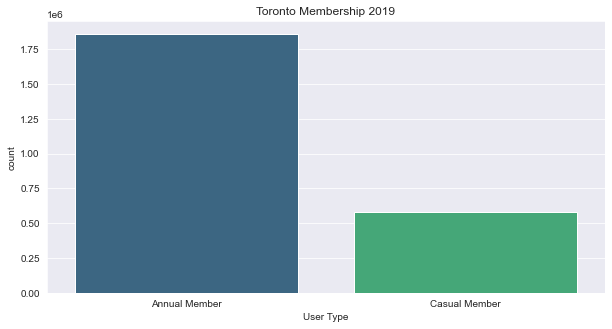

In [63]:
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
sns.countplot(x='User Type',data=bike_share,palette='viridis')
plt.title('Toronto Membership 2019')